## Data Preprocessing on Amazon Smartphones & Accessories rating dataset

### Objective:
To explore the Amazon dataset by performing data analysis using python libraries. And to perform data pre-processing steps to process, manipulate and clean the raw data.
We will implement different preprocessing steps such Data cleaning, Normalization and Scaling, Feature Engineering and so on.

### Context:
Data Preprocessing focuses on processing the data and making it suitable for the model. Before building any machine learning model it is crucial to perform data preprocessing to feed the correct data to the model to learn and predict. Model performance depends on the quality of data feeded to the model to train.
Most of the data preprocessing steps depend on case to case basis.

### Dataset Description:

### Dataset - Amazon Top Rated Smartphones & Accessories 2021
### Dataset source: https://www.kaggle.com/datasets/ankitkalauni/amazon-top-rated-smartphones-accessories-2021
### Attribute Information
- Smartphone: Smartphone model name & it's specification
- Rating: Rating of smartphones out of 5 stars
- Reviews count: Number of reviews
- Offer price: Price(Rupees) of the smartphone after appling offer(Discount)
- Actual price: Smartphone actual price in rupees
- Saving: Discount saving rupees
- Delivery: Delivery option.(free delivery available or not)
- Status of stock & more offers: Status of stock available, along with extra optional offers

### Table of Content
- 1. Basic Data Exploration
- 2. Data Preprocessing
    - 2.1 Dealing with duplicates
    - 2.2 Cleaning the data
          - 2.2.1 Handling Rating Column
          - 2.2.2 Handling Reviews Column
          - 2.2.3 Dealing with Price Column
          - 2.2.4 Handling Saving feature
    - 2.3 Feature Engineering
          - 2.3.1 Creating and adding new features
    - 2.3 Dealing with missing values
    - 2.4 Dealing with outliers
          - 2.4.1 Data Transformation 
    - 2.5 Dealing with Categorical data
          - 2.5.1 One Hot Encoding
    - 2.6 Normalization
          - 2.6.1 Min Max Scalar
          - 2.6.2 Standard Scalar

## Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Load the dataset

In [ ]:
#df = pd.read_csv('Amazon.csv')
#df.head()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Amazon.csv')
df.head()

Mounted at /content/drive


,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2 out of 5 stars,"95,519","₹13,999","₹15,999","Save ₹2,000 (13%)",FREE Delivery by Amazon,NaN
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN


## 1. Explore the data

In [3]:
# shape method can be used to check the exact shape of data
df.shape 

(1368, 8)

In [4]:
#info() function gives information about each feature such as no. of samples(rows), no. of columns along with their data types
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Smartphone                     1368 non-null   object
 1   Rating                         1368 non-null   object
 2   Reviews count                  1368 non-null   object
 3   Offer price                    1154 non-null   object
 4   Actual price                   1042 non-null   object
 5   Saving                         1151 non-null   object
 6   Delivery                       685 non-null    object
 7   Status of stock & more offers  498 non-null    object
dtypes: object(8)
memory usage: 85.6+ KB


- There are 1368 entries and 8 columns.
- All the columns are identified as object datatype, need to analyse the data and convert them into suitable datatypes.
- There are some missing values in the dataset as well.

In [ ]:
#nuniques() function provides the total number of uniques values present in each feature
df.nunique() 

Smartphone                       1308
Rating                             11
Reviews count                     363
Offer price                       511
Actual price                      281
Saving                            612
Delivery                            4
Status of stock & more offers      17
dtype: int64

- There are 11 unique ratings listed.
- This dataset has 1308 different smartphones.

## 2. Data Preprocessing

### Question 1. With every new dataset there is a high probability of getting duplicate entires. Find and drop duplicate values if there are any.

#### 2.1 Dealing with duplicates

In [5]:
# Identify duplicates records in the data
len(df[df.duplicated()])

56

In [6]:
# Removing Duplicates
df.drop_duplicates(keep='first',inplace=True)

In [7]:
# Check for duplicate values again
len(df[df.duplicated()])

0

- We had 56 dupicated rows in our dataset.
- We removed all of them using drop_duplicates() function.

### Question 2. We should make a note that datatype of all the features is in object type and has some unwanted characters like comma's and  '₹' sign. Try to remove unwanted characters in the data and convert the datatypes to there suitable datatypes.

#### 2.2 Data Cleaning

In [8]:
df.head(2)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2 out of 5 stars,"87,809","₹9,499","₹10,999","Save ₹1,500 (14%)",FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2 out of 5 stars,"74,587","₹6,999","₹8,499","Save ₹1,500 (18%)",FREE Delivery by Amazon,NaN


##### 2.2.1 Handling rating column

In [9]:
## Splitting the string and Retreving the numeric value and converting the 'feature rating' to float datatype.
df['Rating'] = df['Rating'].str.split(' ').str.get(0).astype(float)

In [10]:
df['Rating'].head()

0    4.2
1    4.2
2    4.2
3    4.2
4    4.2
Name: Rating, dtype: float64

##### 2.2.2 Handling Reviews count column

In [11]:
## Replacing comma and converting feature 'Reviews count' as integer.
df['Reviews count'] = df['Reviews count'].str.replace(',','').astype(int)

In [12]:
df['Reviews count'].head()

0    87809
1    74587
2    74587
3    95519
4    87809
Name: Reviews count, dtype: int64

##### 2.2.3 Let's deal with Price columns

In [13]:
## Replacing comma and '₹' and converting feature 'Offer price' as integer.
df['Offer price'] = df['Offer price'].str.replace(',','')
df['Offer price'] = df['Offer price'].str.replace('₹','')
df['Offer price'] = df['Offer price'].str.replace('.','')

## Note:- Since feature offer price is having null values, the nan values dtype will be float by default, if we try converting 
## datatype into integer it will throw an error, So converting only not null values into int.
## After imputing null values we will convert those datatype also.
df.loc[df['Offer price'].notnull(), 'Offer price'] = df.loc[df['Offer price'].notnull(), 'Offer price'].apply(int)

In [14]:
## Replacing comma and '₹' and converting feature 'Actual price' as integer.
df['Actual price'] = df['Actual price'].str.replace(',','')
df['Actual price'] = df['Actual price'].str.replace('₹','')
df['Actual price'] = df['Actual price'].str.replace('.','')

df.loc[df['Actual price'].notnull(), 'Actual price'] = df.loc[df['Actual price'].notnull(), 'Actual price'].apply(int)

##### 2.2.4 Let's handle the column Saving.

In [15]:
## Splitting the string and retriveing the numeric value.
df['Saving'] = df['Saving'].str.split(' ').str.get(1)

## Replacing comma and '₹' and converting feature 'Actual price' as integer.
df['Saving'] = df['Saving'].str.replace(',','')
df['Saving'] = df['Saving'].str.replace('₹','')
df['Saving'] = df['Saving'].str.replace('.','')
df['Saving'] = df['Saving'].replace(['it','Delivery'],np.nan)

df.loc[df['Saving'].notnull(), 'Saving'] = df.loc[df['Saving'].notnull(), 'Saving'].apply(int)

In [16]:
## Final dataframe after removal of unwanted characters:
df.head(3)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,87809,9499,10999,1500,FREE Delivery by Amazon,NaN
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2,74587,6999,8499,1500,FREE Delivery by Amazon,NaN
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2,74587,6999,8499,1500,FREE Delivery by Amazon,NaN


- After cleaning different features from our dataset our data is free from special characters, commas and generic symbols.

### Question 3. Write a function to create a new column as 'Rating_category'. If the rating is greater than 3.5 group those records as high and rest as low.

#### 2.3 Feature Engineering

##### 2.3.1 Creating and Adding new feature
- Let's create a new feature as 'Rating_category' by grouping ratings to high and low categories(>3.5 is high rest low)

In [17]:
## create a copy of the dataset
df1 = df.copy()
## Using lambda function
df1['rating_category'] = df1.apply(lambda x:'high' if (x['Rating'])>3.5 else 'low', axis=1)
df1.head(5)

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery,Status of stock & more offers,rating_category
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,87809,9499,10999,1500,FREE Delivery by Amazon,NaN,high
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2,74587,6999,8499,1500,FREE Delivery by Amazon,NaN,high
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2,74587,6999,8499,1500,FREE Delivery by Amazon,NaN,high
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2,95519,13999,15999,2000,FREE Delivery by Amazon,NaN,high
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2,87809,9499,10999,1500,FREE Delivery by Amazon,NaN,high


- A new feature names 'rating_category' was added to the copy of the dataset in which if the rating is more than 3.5 it stores high or else low.

### Question 4. Missing value can add bias to the results of the machine learning models and/or reduce the accuracy of the model. Find the missing values in the dataset and treat them with appropriate methods.

#### 2.3 Dealing with missing values

In [18]:
## check the percentage of missing values 
df.isnull().sum()/len(df)*100

Smartphone                        0.000000
Rating                            0.000000
Reviews count                     0.000000
Offer price                      15.701220
Actual price                     23.856707
Saving                           23.856707
Delivery                         49.695122
Status of stock & more offers    63.948171
dtype: float64

- The column 'Status of stock & more offere' has missing values greater than 60%, let us drop the column 'status of stock & more offers'

In [19]:
df.drop(['Status of stock & more offers'],axis=1,inplace=True)

- Let's check the distribution of the numerical features such as 'Offer price', 'Actual price', & 'Saving' using visualization.

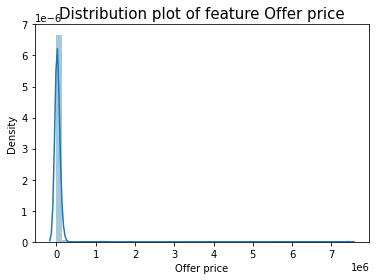

In [20]:
### Let's analyse 'Offer price' column
sns.distplot(df['Offer price'])
plt.title('Distribution plot of feature Offer price',fontsize=15)
plt.show()

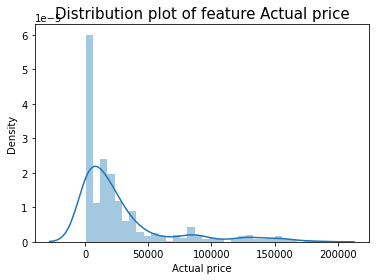

In [21]:
### Let's analyse 'Actual price' column
sns.distplot(df['Actual price'])
plt.title('Distribution plot of feature Actual price',fontsize=15)
plt.show()

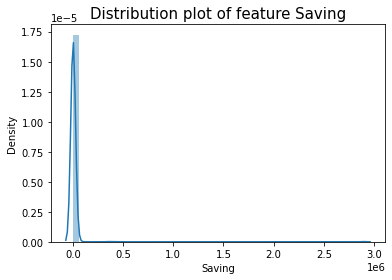

In [22]:
### Let's analyse 'Saving' column
sns.distplot(df['Saving'])
plt.title('Distribution plot of feature Saving',fontsize=15)
plt.show()

- From the plot we can observe that all the numeric features are skewed
- lets treat these missing values using mean/median imputation technique.

In [23]:
## Imputing the missing values of numerical columns 'offer price' & 'Saving' using median imputation technique.
df['Offer price'] = df['Offer price'].fillna(df['Offer price'].median())
df['Saving'] = df['Saving'].fillna(df['Saving'].median())

## Imputing the missing values of numerical column 'actual price' using mean imputation technique.
df['Actual price'] = df['Actual price'].fillna(df['Actual price'].mean())

In [24]:
## Imputing the missing values of categorical column 'Delivery' using mode imputation technique.
print('mode of column delivery:',df['Delivery'].mode())
df['Delivery'] = df['Delivery'].fillna('FREE Delivery by Amazon')

mode of column delivery: 0    FREE Delivery by Amazon
dtype: object


In [25]:
## Lets recheck the count of missing values
df.isnull().sum()

Smartphone       0
Rating           0
Reviews count    0
Offer price      0
Actual price     0
Saving           0
Delivery         0
dtype: int64

- In this step ,we imputed all missing values from numerical columns as well categorical columns in our dataset.

In [26]:
## Now we have imputed null values, lets convert variables dataypes to its suitable datatypes.
df[['Offer price','Actual price','Saving']] = df[['Offer price','Actual price','Saving']].astype(int)

### Question 5. Outliers are extreme values that tend to influence the data distribution significantly without adding much information in some cases. Find and treat the outliers using suitable approach.

#### 2.4 Dealing with Outliers

In [27]:
## Let's visualise outliers
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Rating,Reviews count,Offer price,Actual price,Saving
0,4.2,87809,9499,10999,1500
1,4.2,74587,6999,8499,1500
2,4.2,74587,6999,8499,1500
3,4.2,95519,13999,15999,2000
4,4.2,87809,9499,10999,1500


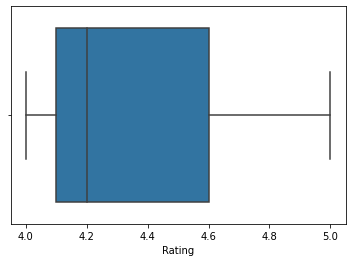

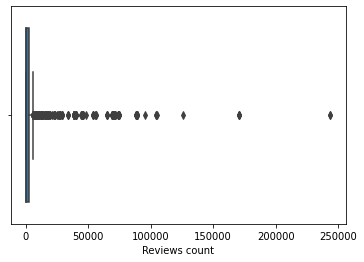

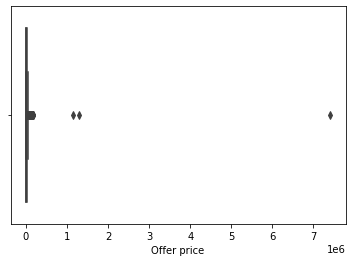

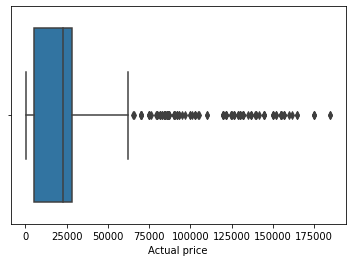

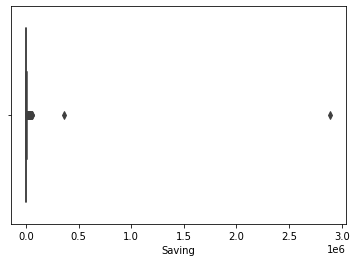

In [28]:
for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()

In [29]:
## Let's check the skewness
df_num.skew()  

Rating            0.901548
Reviews count     5.166531
Offer price      32.646962
Actual price      2.392721
Saving           35.220241
dtype: float64

- From the plot it can be observe that there are outliers in different features.
- As we can see that some features are highly skewed towards right.
- We will try to reduce the effect of outliers using log transformation.

##### 2.4.1 Data Transformation
- Log transformation

In [30]:
## For feature 'Reviews count', 'Offer price', 'Actual Price' & 'Saving' lets apply Log transformation technique in order to reduce the skewness.
df['Reviews count'] = np.log(df['Reviews count'])
df['Offer price'] = np.log(df['Offer price'])
df['Actual price'] = np.log(df['Actual price'])
df['Saving'] = np.log(df['Saving'])

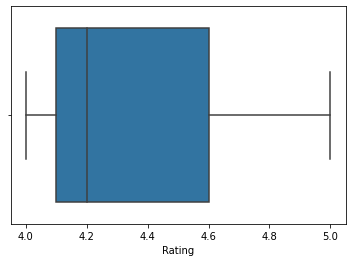

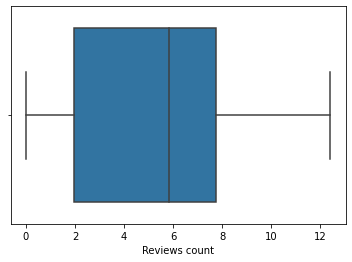

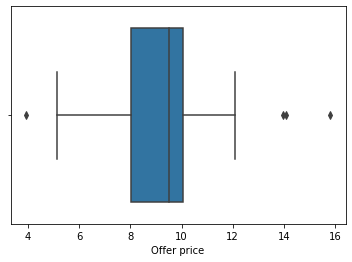

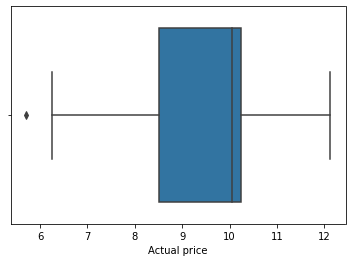

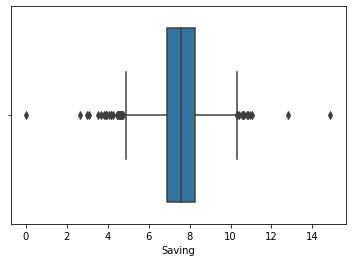

In [31]:
## let's once again visualize the features after dealing with the outliers
df_num = df.select_dtypes(include=np.number)
for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()             

- As we can see we have successfully dealt with outliers.
- We have treated the outliers impact on distribution of the data which was causing the distribution with high skewness
- We reduced the skewness by applying transformation technique.

### Question 6. Most of the machine learning algorithms cannot handle the categorical data. Hence we need to encode the categorical columns in order to feed the data for model building. Encode the categorical columns using appropriate technique.

#### 2.5 Dealing with Categorical data

##### 2.5.1 One Hot Encoding

In [32]:
## Since the feature Delivery doesnot have an hierarchy in the categories, We prefer One Hot encoding
## drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation.
pd.get_dummies(df['Delivery'],drop_first=True).head(4)

,FREE Delivery by Amazon,FREE Delivery on your first order in this category,FREE Delivery over ₹499. Fulfilled by Amazon
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0


- All our categorical datas are now converted to either 1 or 0 using One Hot Encoding

### Question 7. For the distance-based algorithms in machine learning for example clustering models. In order to measure similarities between observations and form clusters they use a distance metric. So, features with high ranges will have a bigger influence on the clustering. Therefore, standardization/normalization is required to ensure the data is on same the scale.

#### 2.6.1 Min_Max Scalar

In [33]:
## We will be trying Min-Max scalar for normalization process
df_copy1 = df.copy()
min_max = MinMaxScaler()
df_copy1.iloc[:,2:6] = min_max.fit_transform(df_copy1.iloc[:,2:6])
df_copy1.head()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,0.917699,0.440688,0.560969,0.491577,FREE Delivery by Amazon
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2,0.904542,0.415036,0.520846,0.491577,FREE Delivery by Amazon
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2,0.904542,0.415036,0.520846,0.491577,FREE Delivery by Amazon
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2,0.924485,0.473259,0.619277,0.510914,FREE Delivery by Amazon
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2,0.917699,0.440688,0.560969,0.491577,FREE Delivery by Amazon


In [34]:
df_copy1.describe()

,Rating,Reviews count,Offer price,Actual price,Saving
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,4.347942,0.420378,0.444889,0.601224,0.504672
std,0.325235,0.279003,0.123544,0.207269,0.085052
min,4.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,0.156881,0.343855,0.438265,0.464323
50%,4.200000,0.469695,0.469234,0.675750,0.510914
75%,4.600000,0.624739,0.514932,0.706776,0.555860
max,5.000000,1.000000,1.000000,1.000000,1.000000


- As we can see from the statistical summary of the normalized data the value range of the features is between 0 and 1.

#### 2.6.2 Standard Scalar

In [35]:
## We can normalize our dataset using Standard Scalar as well
df_copy2 = df.copy()
ss = StandardScaler()
df_copy2.iloc[:,2:6] = ss.fit_transform(df_copy2.iloc[:,2:6])
df_copy2.head()

,Smartphone,Rating,Reviews count,Offer price,Actual price,Saving,Delivery
0,"Redmi 9 (Sky Blue, 4GB RAM, 64GB Storage) | 2....",4.2,1.783179,-0.034022,-0.194290,-0.154020,FREE Delivery by Amazon
1,"Redmi 9A (Nature Green, 2GB RAM, 32GB Storage)...",4.2,1.736003,-0.241737,-0.387945,-0.154020,FREE Delivery by Amazon
2,Redmi 9A (Sea Blue 2GB RAM 32GB Storage) | 2GH...,4.2,1.736003,-0.241737,-0.387945,-0.154020,FREE Delivery by Amazon
3,"Redmi Note 10 (Aqua Green, 4GB RAM, 64GB Stora...",4.2,1.807507,0.229720,0.087134,0.073425,FREE Delivery by Amazon
4,"Redmi 9 (Carbon Black, 4GB RAM, 64GB Storage) ...",4.2,1.783179,-0.034022,-0.194290,-0.154020,FREE Delivery by Amazon


In [36]:
df_copy2.describe()

,Rating,Reviews count,Offer price,Actual price,Saving
count,1312.000000,1.312000e+03,1.312000e+03,1.312000e+03,1.312000e+03
mean,4.347942,-7.273992e-16,-7.693710e-16,2.807713e-16,-7.071748e-16
std,0.325235,1.000381e+00,1.000381e+00,1.000381e+00,1.000381e+00
min,4.000000,-1.507290e+00,-3.602444e+00,-2.901806e+00,-5.935945e+00
25%,4.100000,-9.447845e-01,-8.181128e-01,-7.865192e-01,-4.745862e-01
50%,4.200000,1.768309e-01,1.971302e-01,3.596980e-01,7.342468e-02
75%,4.600000,7.327489e-01,5.671653e-01,5.094463e-01,6.020772e-01
max,5.000000,2.078272e+00,4.494949e+00,1.924692e+00,5.826044e+00


In [37]:
df_copy2_num = df_copy2.select_dtypes(include=np.number)
df_copy2_num.std()

Rating           0.325235
Reviews count    1.000381
Offer price      1.000381
Actual price     1.000381
Saving           1.000381
dtype: float64

- After applying Standard Scalar, our dataset follows standard deviation as 1.

----------
### Happing Learning :)
---------